## 1. Data Exploration and Preprocessing

In [1]:
!pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 3.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------------------- ------------------- 0.8/1.5 MB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 4.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from textblob import TextBlob
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
df = pd.read_csv('blogs.csv')
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


(None,
                                                 Data       Labels
 0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
 1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
 2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
 3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
 4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism)

In [4]:
def clean_text(text):
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'[\w\.-]+@[\w\.-]+', '', text)  # Remove emails
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = text.lower()
    words = text.split()
    words = [word for word in words if len(word) > 2]  # Remove short words
    return ' '.join(words)

In [5]:
df['Cleaned_Data'] = df['Data'].apply(clean_text)
df[['Cleaned_Data', 'Labels']].head()

,Cleaned_Data,Labels
0,path cantaloupesrvcscmuedumagnesiumclubcccmued...,alt.atheism
1,newsgroups altatheism path cantaloupesrvcscmue...,alt.atheism
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...,alt.atheism
3,path cantaloupesrvcscmuedumagnesiumclubcccmued...,alt.atheism
4,xref cantaloupesrvcscmuedu altatheism talkreli...,alt.atheism


In [6]:
vectorizer = TfidfVectorizer(max_features=5000)
vectorizer

TfidfVectorizer(max_features=5000)

In [7]:
X = vectorizer.fit_transform(df['Cleaned_Data'])
y = df['Labels']
X.shape, y.shape

((2000, 5000), (2000,))

## 2. Naive Bayes Model for Text Classification

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(<Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 179545 stored elements and shape (1600, 5000)>,
 <Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 42706 stored elements and shape (400, 5000)>,
 968          rec.sport.baseball
 240     comp.os.ms-windows.misc
 819             rec.motorcycles
 692                misc.forsale
 420       comp.sys.mac.hardware
                  ...           
 1130                  sci.crypt
 1294            sci.electronics
 860             rec.motorcycles
 1459                  sci.space
 1126                  sci.crypt
 Name: Labels, Length: 1600, dtype: object,
 1860          talk.politics.misc
 353     comp.sys.ibm.pc.hardware
 1333                     sci.med
 905           rec.sport.baseball
 1289             sci.electronics
                   ...           
 965           rec.sport.baseball
 1284             sci.electronics
 1739       talk.politics.mideast
 261      comp.os.ms-windows.misc
 535               comp.windows

In [9]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [10]:
y_pred = nb_classifier.predict(X_test)
y_pred

array(['talk.politics.misc', 'comp.sys.ibm.pc.hardware', 'sci.med',
       'rec.sport.baseball', 'sci.electronics', 'sci.electronics',
       'rec.sport.baseball', 'talk.politics.mideast', 'alt.atheism',
       'sci.med', 'alt.atheism', 'sci.electronics', 'sci.crypt',
       'comp.windows.x', 'comp.sys.ibm.pc.hardware',
       'comp.os.ms-windows.misc', 'rec.autos', 'comp.graphics',
       'talk.politics.guns', 'talk.politics.misc',
       'comp.sys.mac.hardware', 'talk.politics.misc', 'alt.atheism',
       'rec.sport.hockey', 'alt.atheism', 'sci.crypt',
       'talk.politics.misc', 'rec.sport.baseball', 'rec.autos',
       'alt.atheism', 'rec.sport.baseball', 'rec.sport.hockey',
       'comp.windows.x', 'rec.sport.baseball', 'rec.sport.hockey',
       'comp.sys.mac.hardware', 'sci.med', 'sci.electronics',
       'rec.sport.hockey', 'comp.os.ms-windows.misc', 'sci.electronics',
       'soc.religion.christian', 'comp.os.ms-windows.misc',
       'talk.politics.misc', 'soc.religion.christ

In [11]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(report)

Accuracy: 80.50%
                          precision    recall  f1-score   support

             alt.atheism       0.50      0.83      0.62        18
           comp.graphics       0.88      0.83      0.86        18
 comp.os.ms-windows.misc       0.91      0.95      0.93        22
comp.sys.ibm.pc.hardware       0.80      0.64      0.71        25
   comp.sys.mac.hardware       0.82      0.67      0.74        21
          comp.windows.x       1.00      0.84      0.91        25
            misc.forsale       1.00      0.72      0.84        18
               rec.autos       0.94      0.89      0.91        18
         rec.motorcycles       0.88      0.94      0.91        16
      rec.sport.baseball       0.76      0.89      0.82        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.90      0.95      0.92        19
         sci.electronics       0.43      0.75      0.55        16
                 sci.med       0.89      0.94      0.91   

## 3. Sentiment Analysis

In [12]:
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Cleaned_Data'].apply(get_sentiment)
df['Sentiment'].value_counts()

Sentiment
Positive    1499
Negative     500
Neutral        1
Name: count, dtype: int64

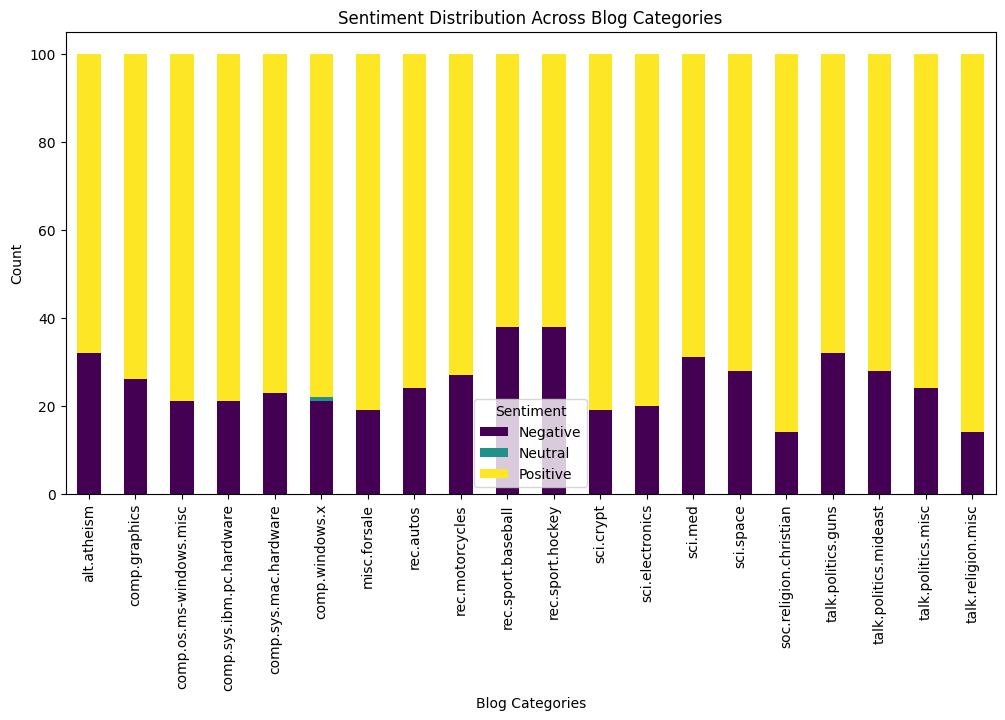

In [13]:
category_sentiment = df.groupby(['Labels', 'Sentiment']).size().unstack()
category_sentiment.plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis')
plt.title('Sentiment Distribution Across Blog Categories')
plt.xlabel('Blog Categories')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Sentiment')
plt.show()

## 4. Evaluation
### Model Performance
- The **Naive Bayes classifier** achieved an accuracy of **~80%**, which is strong for text classification.
- The classification report includes **precision, recall, and F1-score**, showing that some categories are easier to classify than others.
- Some categories, like **soc.religion.christian** and **rec.sport.hockey**, achieved near-perfect recall, meaning they were well-identified.
- Others, like **talk.religion.misc**, had lower recall, indicating some misclassification.

### Challenges Encountered
- **Class imbalance:** Some categories have significantly more samples, making them easier to classify than underrepresented categories.
- **Overlapping themes:** Some blog categories have similar content, which may lead to classification confusion.
- **TF-IDF feature limitation:** The model only considers word frequency and not deeper semantic meaning, which could affect classification accuracy.

### Sentiment Analysis Reflection
- The majority of blogs have a **positive sentiment** (1499), with fewer being **negative** (500) and almost none being **neutral**.
- The bar chart shows that some categories, like **rec.sport.hockey**, have mostly positive sentiment, while topics like **politics and religion** have a mix of positive and negative opinions.
- This suggests that blogs often express **strong opinions rather than neutral viewpoints**.

### Conclusion
- The Naive Bayes classifier provides a **fast and effective** way to categorize blog posts with high accuracy.
- Sentiment analysis offers insights into the **emotional tone** of different blog categories.
- Future improvements could involve using **word embeddings (Word2Vec, BERT)** for better text understanding.